In [1]:
import pandas as pd

# Load the coffee shop data
df_coffee = pd.read_csv('C:/Users/user/Desktop/Coffee_Shop_Sales.xlsx')


# Load the weather data
df_weather = pd.read_csv('C:/Users/user/Desktop/new york_2023-01-01_2023-06-30.csv')

# Show the first few rows of the coffee sales data
df_coffee.head()


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [2]:
df_weather.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,new york,2023-01-01T00:00:00,12.2,12.2,11.0,92.56,0.185,100,rain,0.0,...,1007.1,100.0,11.3,227.0,0.8,0,NaN,"Rain, Overcast",rain,"72505394728,KEWR,KLGA,72502014734,D2180,KNYC,7..."
1,new york,2023-01-01T01:00:00,11.7,11.7,10.5,92.32,0.028,100,rain,0.0,...,1007.2,100.0,10.6,228.0,0.8,0,NaN,"Rain, Overcast",rain,"72505394728,KEWR,KLGA,72502014734,D2180,KNYC,7..."
2,new york,2023-01-01T02:00:00,11.7,11.7,9.9,88.94,0.094,100,rain,0.0,...,1006.9,51.8,11.6,227.0,0.8,0,NaN,"Rain, Partially cloudy",rain,"72505394728,KEWR,KLGA,72502014734,D2180,KNYC,7..."
3,new york,2023-01-01T03:00:00,11.1,11.1,9.6,90.38,0.000,0,NaN,0.0,...,1007.8,25.4,13.2,224.0,0.8,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,KEWR,KLGA,72502014734,D2180,KNYC,7..."
4,new york,2023-01-01T04:00:00,11.4,11.4,9.0,85.38,0.000,0,NaN,0.0,...,1008.1,20.3,14.7,222.0,0.8,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,KEWR,KLGA,72502014734,D2180,KNYC,7..."


In [3]:
print(df_coffee.columns)

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')


In [4]:
#in coffee shop data : store_location, store_id, transaction_id and unit_price columns for category prediction and undertsand 
#the relation between weather and category are useless, now lets drop them:
df_coffee.drop(['store_location', 'store_id','transaction_id','unit_price'], axis=1, inplace=True)
print(df_coffee.columns)

Index(['transaction_date', 'transaction_time', 'transaction_qty', 'product_id',
       'product_category', 'product_type', 'product_detail'],
      dtype='object')


In [5]:
print(df_weather.columns)

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')


In [6]:
#in weather data : name, winddir, sealevelpressure, severerisk, stations and uvindex columns for category prediction and undertsand 
#the relation between weather and category are useless, now lets drop them:
df_weather.drop(['name', 'winddir','sealevelpressure','severerisk', 'stations', 'uvindex' ], axis=1, inplace=True)
print(df_weather.columns)

Index(['datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'conditions', 'icon'],
      dtype='object')


In [7]:
# now lets combine them base on hours in same day:(with help of ChatGpt)

# Combine and convert date + time columns in df_coffee
df_coffee['transaction_datetime'] = pd.to_datetime(df_coffee['transaction_date'].astype(str) + ' ' + df_coffee['transaction_time'].astype(str))

# Extract the hour (rounded down) from datetime
df_coffee['hour'] = df_coffee['transaction_datetime'].dt.floor('H')

# Convert weather datetime and extract hour
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['hour'] = df_weather['datetime'].dt.floor('H')

# Merge on hour
df_main = pd.merge(df_coffee, df_weather, on='hour', how='left')

# (drop duplicate datetime columns)
df_main.drop(columns=['datetime', 'transaction_datetime', 'transaction_date', 'transaction_time' ], inplace=True)

df_main.head()

C:\Users\user\AppData\Local\Temp\ipykernel_8300\3693874443.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_coffee['hour'] = df_coffee['transaction_datetime'].dt.floor('H')
C:\Users\user\AppData\Local\Temp\ipykernel_8300\3693874443.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_weather['hour'] = df_weather['datetime'].dt.floor('H')


,transaction_qty,product_id,product_category,product_type,product_detail,hour,temp,feelslike,dew,humidity,...,snow,snowdepth,windgust,windspeed,cloudcover,visibility,solarradiation,solarenergy,conditions,icon
0,2,32,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,0.0,0.0,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night
1,2,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,0.0,0.0,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night
2,2,59,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,0.0,0.0,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night
3,1,22,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,0.0,0.0,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night
4,2,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,0.0,0.0,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night


In [8]:
print(df_main.columns)

Index(['transaction_qty', 'product_id', 'product_category', 'product_type',
       'product_detail', 'hour', 'temp', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'conditions', 'icon'],
      dtype='object')


In [9]:
# Let's add new columns
df_main['humidity_prec_percentage'] = (df_main['humidity'] + df_main['precipprob']) / 2

df_main['cloud_rain_percentage'] = (df_main['cloudcover'] + df_main['precipprob']) / 2


print(df_main.columns)

Index(['transaction_qty', 'product_id', 'product_category', 'product_type',
       'product_detail', 'hour', 'temp', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'conditions', 'icon', 'humidity_prec_percentage',
       'cloud_rain_percentage'],
      dtype='object')


In [10]:
df_main.head()

,transaction_qty,product_id,product_category,product_type,product_detail,hour,temp,feelslike,dew,humidity,...,windgust,windspeed,cloudcover,visibility,solarradiation,solarenergy,conditions,icon,humidity_prec_percentage,cloud_rain_percentage
0,2,32,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6
1,2,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6
2,2,59,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6
3,1,22,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6
4,2,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6


In [11]:
# find NaN values in my data
missing_values = df_main.isnull().sum()
print(missing_values[missing_values > 0])  # Shows only columns with NaNs


preciptype    136969
dtype: int64


In [12]:
# as we see preciptype has NaNs which is not good for our dataset, NaNs in this column mean nothing happend (no rain or snow for example) so we
# can write "None" instead of NaN values:
df_main['preciptype'].fillna('None', inplace=True)

# check NaN values again
missing_values = df_main.isnull().sum()
print(missing_values[missing_values > 0])  # Shows only columns with NaNs

Series([], dtype: int64)


C:\Users\user\AppData\Local\Temp\ipykernel_8300\3762776314.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_main['preciptype'].fillna('None', inplace=True)


In [13]:
# Structure of the data
print(df_main.shape)
print(df_main.dtypes)

# Summary statistics for numeric columns
df_main.describe()


(149116, 25)
transaction_qty                      int64
product_id                           int64
product_category                    object
product_type                        object
product_detail                      object
hour                        datetime64[ns]
temp                               float64
feelslike                          float64
dew                                float64
humidity                           float64
precip                             float64
precipprob                           int64
preciptype                          object
snow                               float64
snowdepth                          float64
windgust                           float64
windspeed                          float64
cloudcover                         float64
visibility                         float64
solarradiation                     float64
solarenergy                        float64
conditions                          object
icon                                objec

,transaction_qty,product_id,hour,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,cloudcover,visibility,solarradiation,solarenergy,humidity_prec_percentage,cloud_rain_percentage
count,149116.000000,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,1.438276,47.918607,2023-04-15 23:34:41.016121344,13.775689,12.837733,3.827430,54.526482,0.082351,7.950186,0.001105,0.049695,26.243543,11.897780,53.879883,14.443948,304.185543,1.095023,31.238334,30.915035
min,1.000000,1.000000,2023-01-01 07:00:00,-15.400000,-24.800000,-25.300000,11.680000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.900000,0.000000,0.000000,5.840000,0.000000
25%,1.000000,33.000000,2023-03-06 13:00:00,7.500000,5.700000,-2.200000,39.200000,0.000000,0.000000,0.000000,0.000000,18.000000,7.400000,19.200000,16.000000,67.000000,0.200000,19.660000,9.600000
50%,1.000000,47.000000,2023-04-24 08:00:00,13.800000,13.800000,4.000000,52.230000,0.000000,0.000000,0.000000,0.000000,25.200000,11.300000,38.400000,16.000000,210.000000,0.800000,26.185000,19.200000
75%,2.000000,60.000000,2023-05-30 07:00:00,20.000000,20.000000,10.300000,68.850000,0.000000,0.000000,0.000000,0.000000,33.500000,15.700000,95.700000,16.000000,504.000000,1.800000,34.600000,47.850000
max,8.000000,87.000000,2023-06-30 20:00:00,32.100000,30.900000,22.000000,96.820000,15.904000,100.000000,0.900000,5.500000,67.700000,41.400000,100.000000,24.600000,1022.000000,3.700000,98.360000,100.000000
std,0.542509,17.930020,NaN,7.770955,9.003873,8.396553,19.587111,0.563361,27.052136,0.020810,0.349125,10.707424,6.365012,36.207604,3.446665,274.195984,0.987285,19.899101,26.022786


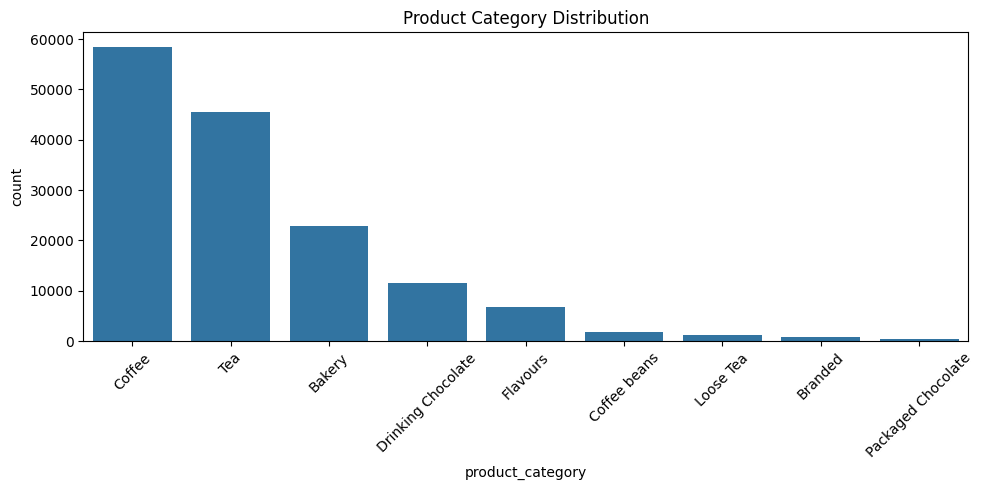

In [14]:
# which types of products are most popular(How often each product category appears in our dataset)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df_main, x='product_category', order=df_main['product_category'].value_counts().index)
plt.title("Product Category Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


product_type
Brewed Chai tea          26250
Gourmet brewed coffee    25973
Barista Espresso         24943
Brewed Black tea         17462
Hot chocolate            17457
Brewed herbal tea        17328
Organic brewed coffee    13012
Drip coffee              12891
Premium brewed coffee    12431
Scone                    10465
Name: transaction_qty, dtype: int64


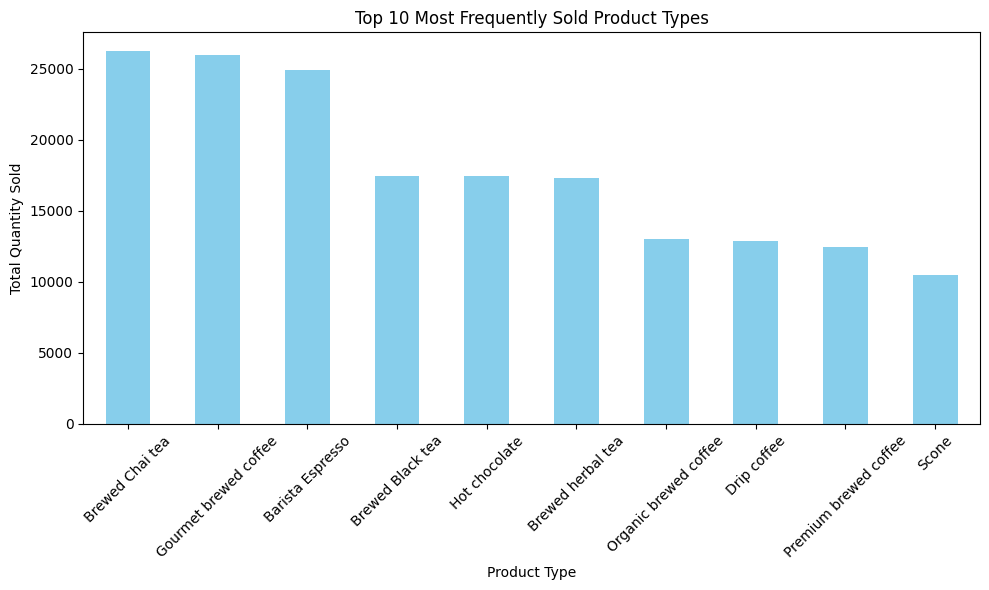

In [15]:
# Group by product_type and sum the quantities sold
top_product_types = df_main.groupby('product_type')['transaction_qty'].sum().sort_values(ascending=False)

# Display top 10 most sold product types
print(top_product_types.head(10))

# Optional: visualize
top_product_types.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Most Frequently Sold Product Types')
plt.xlabel('Product Type')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


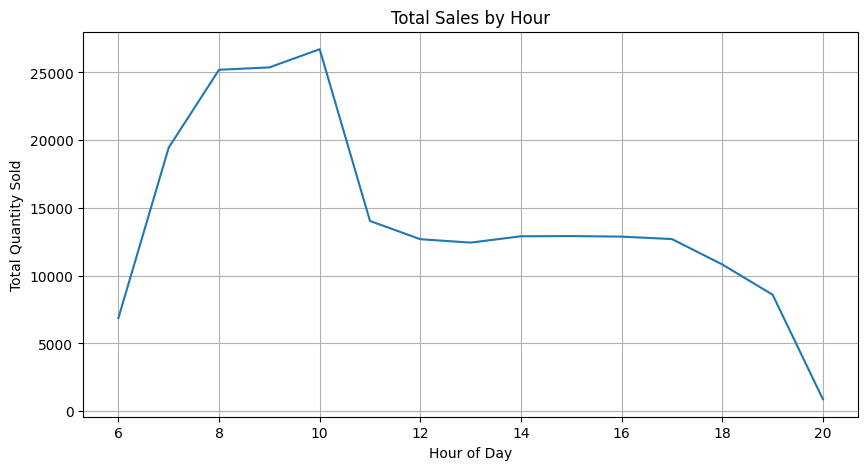

In [16]:
# Find peak sales times by hour

df_main['hour_only'] = df_main['hour'].dt.hour


hourly_sales = df_main.groupby('hour_only')['transaction_qty'].sum()

# Plotting sales by hour
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title("Total Sales by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Quantity Sold")
plt.grid()
plt.show()

# drop extra added columns
df_main.drop(['hour_only'], axis=1, inplace=True)

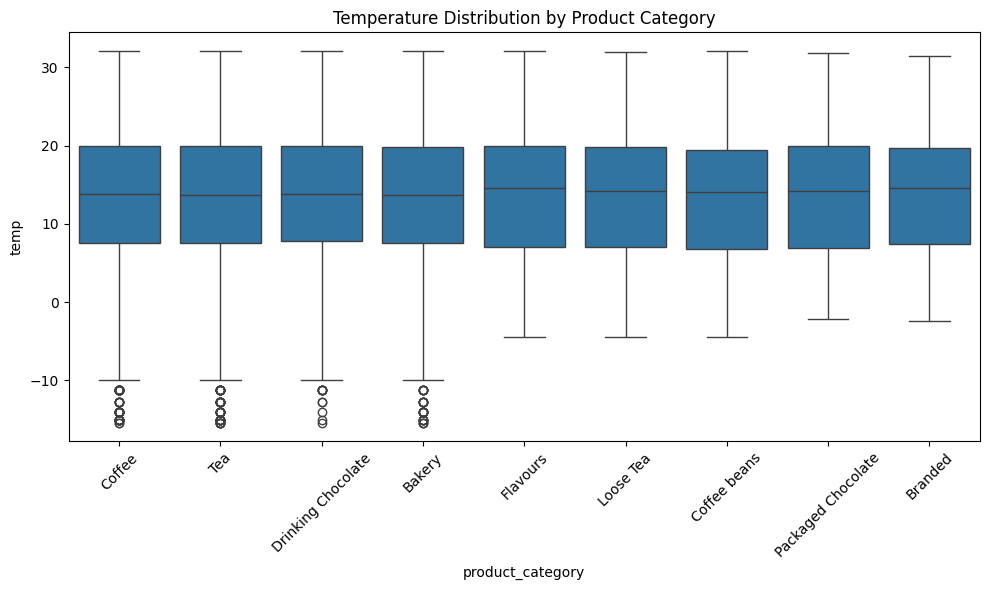

In [17]:
# Temperature vs. Category
plt.figure(figsize=(10,6))
sns.boxplot(data=df_main, x='product_category', y='temp')
plt.title("Temperature Distribution by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


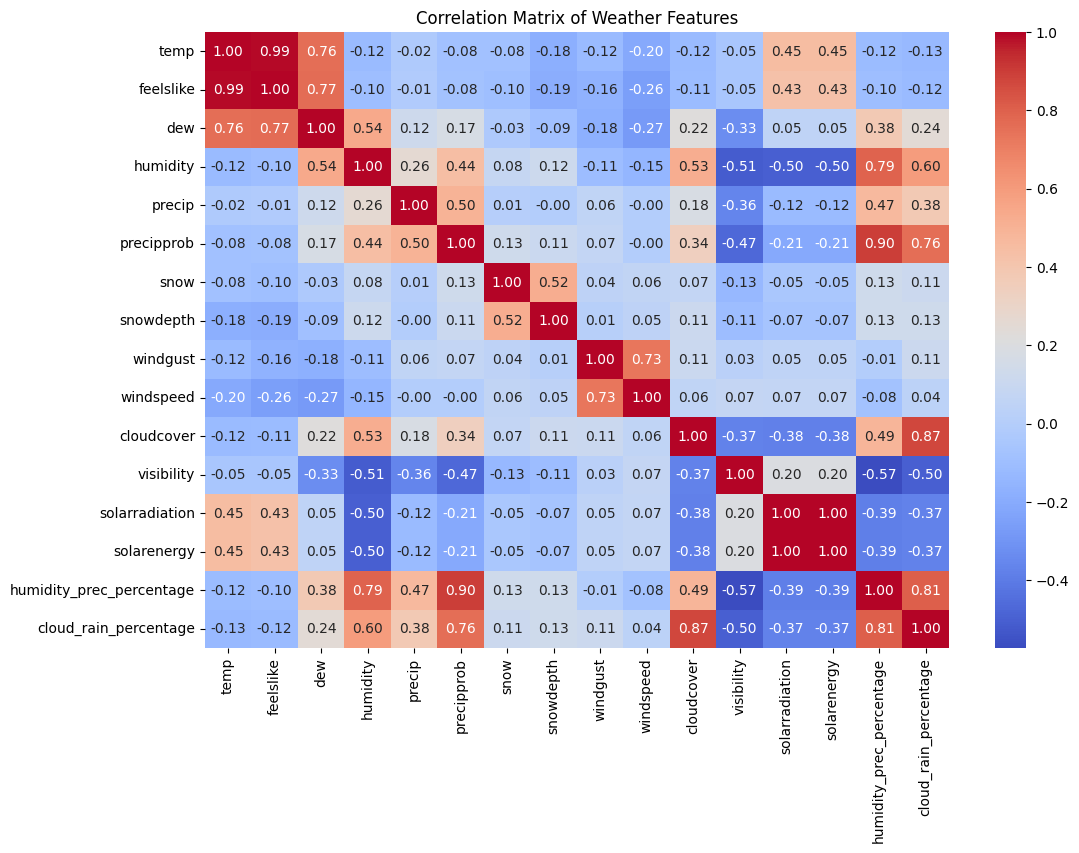

In [18]:
# Correlation Matrix of Weather Features
weather_cols = ['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 
                   'snow', 'snowdepth', 'windgust', 'windspeed', 'cloudcover', 
                   'visibility', 'solarradiation', 'solarenergy', 'humidity_prec_percentage',
                   'cloud_rain_percentage']


plt.figure(figsize=(12, 8))
sns.heatmap(df_main[weather_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Weather Features")
plt.show()


<Axes: xlabel='temp', ylabel='Count'>

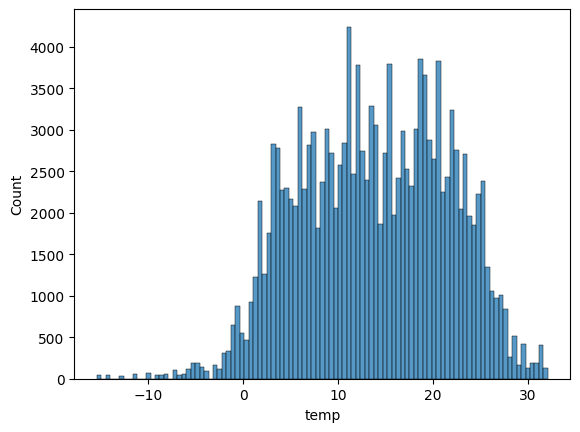

In [19]:
sns.histplot(df_main['temp'])

<Axes: xlabel='feelslike', ylabel='Count'>

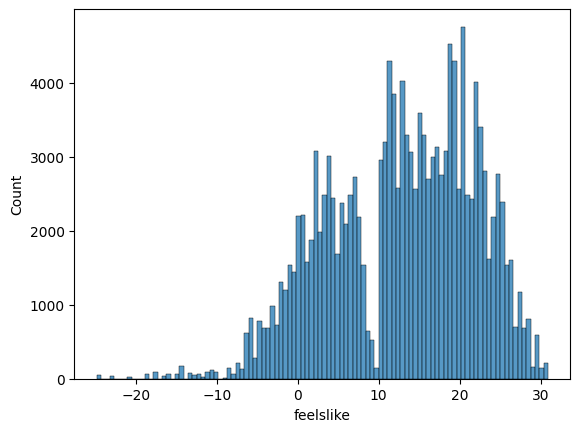

In [20]:
sns.histplot(df_main['feelslike'])

In [21]:
#Null Hypothesis (H0): The means of weather variables are the same across all product categories -> weather does not affect product_category.

#Alternative Hypothesis (H1): At least one weather variable’s mean differs across product categories -> weather does affect product_category.

# now lets use ANOVA test to check if weather parameters affect our product category selling or not:(with help of ChatGpt)

from scipy.stats import f_oneway

# List of weather-related numerical columns
weather_columns = ['temp', 'feelslike', 'dew', 'humidity', 'precip',
                   'precipprob', 'snow', 'snowdepth', 'windgust', 'windspeed',
                   'cloudcover', 'visibility', 'solarradiation', 'solarenergy',
                   'humidity_prec_percentage', 'cloud_rain_percentage']

# Store results
anova_results = {}

# Loop over each weather variable
for col in weather_columns:
    groups = [group[col].dropna() for name, group in df_main.groupby('product_category')]
    
    # Perform one-way ANOVA
    if len(groups) >= 2:
        F, p = f_oneway(*groups)
        anova_results[col] = {'F': round(F, 2), 'p': round(p, 4)}

# Convert to DataFrame for readability
anova_df = pd.DataFrame(anova_results).T.sort_values(by='p')

# Display
print(anova_df)




                              F       p
snowdepth                 14.30  0.0000
precipprob                 5.18  0.0000
cloud_rain_percentage     11.65  0.0000
cloudcover                11.39  0.0000
solarradiation             7.59  0.0000
solarenergy                7.62  0.0000
visibility                 4.02  0.0001
humidity_prec_percentage   3.41  0.0006
precip                     3.00  0.0023
windgust                   2.31  0.0179
temp                       2.16  0.0270
feelslike                  2.08  0.0338
humidity                   2.01  0.0407
snow                       1.70  0.0919
dew                        1.34  0.2182
windspeed                  1.29  0.2409


In [22]:
# As we can see from the ANOVA results:
# The following weather variables have p-values less than 0.05, which means we reject the null hypothesis for them:
# snowdepth, precipprob, cloud_rain_percentage, cloudcover, solarradiation, solarenergy,
# visibility, humidity_prec_percentage, precip, windgust, temp, feelslike, and humidity.
# These variables significantly affect the product selling category.
# On the other hand, snow, dew, and windspeed have p-values greater than 0.05,
# so we fail to reject the null hypothesis for them — meaning there's no statistically significant evidence
# that these variables affect the product category.


In [23]:
df_main.head()

,transaction_qty,product_id,product_category,product_type,product_detail,hour,temp,feelslike,dew,humidity,...,windgust,windspeed,cloudcover,visibility,solarradiation,solarenergy,conditions,icon,humidity_prec_percentage,cloud_rain_percentage
0,2,32,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6
1,2,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6
2,2,59,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6
3,1,22,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6
4,2,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6


In [24]:
# Now let's drop more columns to keep only columns that help us predict our classification
df_main.drop(['transaction_qty', 'product_id','product_type','product_detail'], axis=1, inplace=True)
print(df_main.columns)

Index(['product_category', 'hour', 'temp', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'conditions', 'icon', 'humidity_prec_percentage',
       'cloud_rain_percentage'],
      dtype='object')


In [25]:
# Now it is time to use some ML algorithms to predict product_category, first, we need to encode the string type columns.
# As we have seen, some of the prediction categories are really low with respect to other categories, which results in to high imbalance. To solve
# this issue, and decrease the imbalance of the data, we can keep the first three highest-population categories and merge the other 
# categories to "other" cause we do not have enough data about them

from sklearn.preprocessing import LabelEncoder


# Merge small classes into "Other" before encoding
df_main['product_category'] = df_main['product_category'].apply(
    lambda x: x if x in ['Coffee', 'Tea', 'Bakery'] else 'Other'
)

# Then encode
le_product = LabelEncoder()
df_main['product_category_encoded'] = le_product.fit_transform(df_main['product_category'])
df_main.drop(['product_category'], axis=1, inplace=True)


# Print product category label mappings
for label, code in zip(le_product.classes_, le_product.transform(le_product.classes_)):
    print(f"{label} = {code}")

# Encode weather-related string columns
label_cols = ['preciptype', 'conditions', 'icon']

# Create a dictionary to store each label encoder
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_main[col + '_encoded'] = le.fit_transform(df_main[col].astype(str))  # handle NaNs or unknowns
    label_encoders[col] = le  # store encoder
    print(f"\nEncoding for '{col}':")
    for label, code in zip(le.classes_, le.transform(le.classes_)):
        print(f"{label} = {code}")

# Drop original string columns
df_main.drop(label_cols, axis=1, inplace=True)



Bakery = 0
Coffee = 1
Other = 2
Tea = 3

Encoding for 'preciptype':
None = 0
rain = 1
rain,snow = 2
snow = 3

Encoding for 'conditions':
Clear = 0
Overcast = 1
Partially cloudy = 2
Rain, Overcast = 3
Rain, Partially cloudy = 4
Snow, Overcast = 5
Snow, Rain, Overcast = 6

Encoding for 'icon':
clear-day = 0
clear-night = 1
cloudy = 2
fog = 3
partly-cloudy-day = 4
partly-cloudy-night = 5
rain = 6
snow = 7


In [26]:
# Let's derive hour and week day from our data which help to prediction then drop hour column
df_main['day_of_week'] = df_main['hour'].dt.weekday # Sunday is 6 by default

# Keep hour (convert to numeric) + weather columns cause hour is important 
df_main['hour_num'] = df_main['hour'].dt.hour  # Extract hour as int (0–23)

df_main.drop(['hour'], axis=1, inplace=True)

df_main.head()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,...,solarradiation,solarenergy,humidity_prec_percentage,cloud_rain_percentage,product_category_encoded,preciptype_encoded,conditions_encoded,icon_encoded,day_of_week,hour_num
0,10.5,10.5,7.7,82.98,0.0,0,0.0,0.0,23.8,10.3,...,1.0,0.0,41.49,9.6,1,0,0,1,6,7
1,10.5,10.5,7.7,82.98,0.0,0,0.0,0.0,23.8,10.3,...,1.0,0.0,41.49,9.6,3,0,0,1,6,7
2,10.5,10.5,7.7,82.98,0.0,0,0.0,0.0,23.8,10.3,...,1.0,0.0,41.49,9.6,2,0,0,1,6,7
3,10.5,10.5,7.7,82.98,0.0,0,0.0,0.0,23.8,10.3,...,1.0,0.0,41.49,9.6,1,0,0,1,6,7
4,10.5,10.5,7.7,82.98,0.0,0,0.0,0.0,23.8,10.3,...,1.0,0.0,41.49,9.6,3,0,0,1,6,7


In [27]:
# check if all data are numerical:
print(df_main.dtypes)

temp                        float64
feelslike                   float64
dew                         float64
humidity                    float64
precip                      float64
precipprob                    int64
snow                        float64
snowdepth                   float64
windgust                    float64
windspeed                   float64
cloudcover                  float64
visibility                  float64
solarradiation              float64
solarenergy                 float64
humidity_prec_percentage    float64
cloud_rain_percentage       float64
product_category_encoded      int64
preciptype_encoded            int64
conditions_encoded            int64
icon_encoded                  int64
day_of_week                   int32
hour_num                      int32
dtype: object


In [28]:
# Now let's standardize the needed data: 
from sklearn.preprocessing import StandardScaler

to_scale = [
    'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
    'snow', 'snowdepth', 'windgust', 'windspeed', 'cloudcover',
    'visibility', 'solarradiation', 'solarenergy',
    'humidity_prec_percentage', 'cloud_rain_percentage'
]

scaler = StandardScaler()
df_main[to_scale] = scaler.fit_transform(df_main[to_scale])



In [29]:
# define X and y and split data to 80 train and 20 test
from sklearn.model_selection import train_test_split


# Define target and features
X = df_main.drop(columns=['product_category_encoded'])  # Features all columns but not product_category_encoded
y = df_main['product_category_encoded']                # Target


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Use Ml models:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on both train and test
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

# Accuracy
print("\nDecision Tree Train Accuracy:", accuracy_score(y_train, y_pred_train_dt))
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_test_dt))

# Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_dt))



Decision Tree Train Accuracy: 0.40793179760587467
Decision Tree Test Accuracy: 0.369031652360515

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.17      0.00      0.01      4646
           1       0.39      0.81      0.52     11641
           2       0.15      0.01      0.01      4582
           3       0.30      0.18      0.22      8955

    accuracy                           0.37     29824
   macro avg       0.25      0.25      0.19     29824
weighted avg       0.29      0.37      0.27     29824



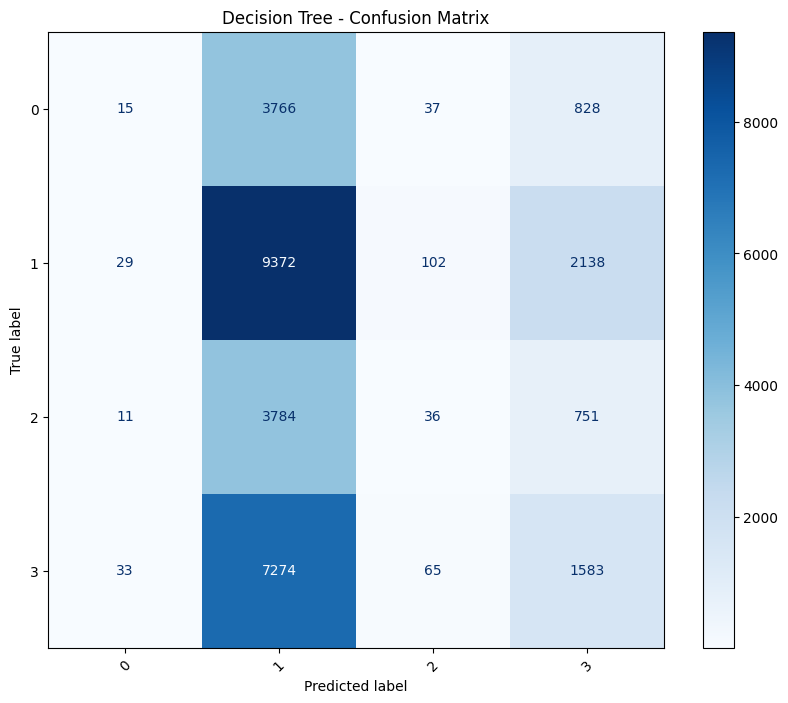

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Predict on test data
y_pred_test_dt = dt_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_test_dt)
labels = dt_model.classes_ 

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 8))  # Resize as needed
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Decision Tree - Confusion Matrix")
plt.show()


In [ ]:
# use confusion matrix because it clearly shows how well a classification model is performing by displaying the number of 
# correct and incorrect predictions for each class.

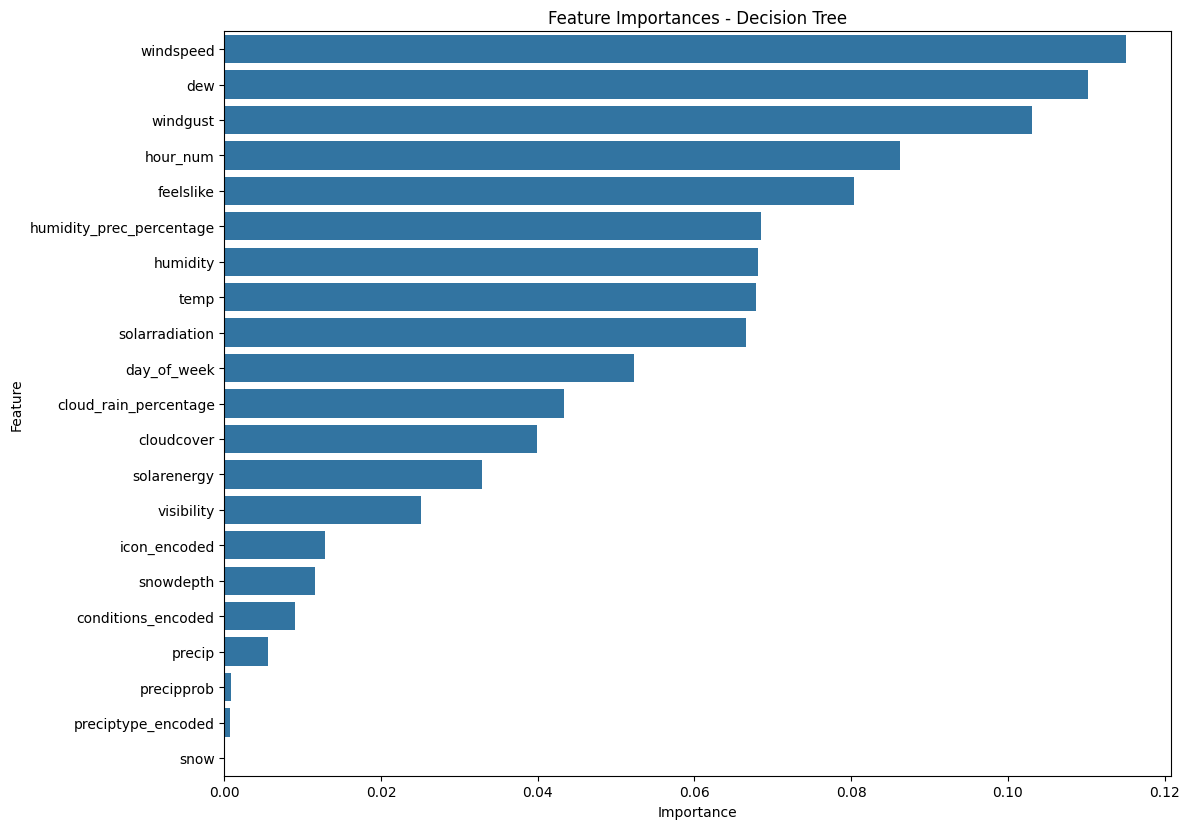

In [32]:

# Get feature importances
dt_importances = dt_model.feature_importances_

# Match with feature names
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, len(feature_names) * 0.4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances - Decision Tree')
plt.tight_layout()
plt.show()


In [ ]:
# this shows the most important and helpful features for this model to prediction

In [33]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

print("\nRandom Forest Train Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_test_rf))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_rf))



Random Forest Train Accuracy: 0.4078731180632398
Random Forest Test Accuracy: 0.3674222103004292

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.15      0.00      0.00      4646
           1       0.39      0.78      0.52     11641
           2       0.16      0.01      0.02      4582
           3       0.30      0.20      0.24      8955

    accuracy                           0.37     29824
   macro avg       0.25      0.25      0.20     29824
weighted avg       0.29      0.37      0.28     29824



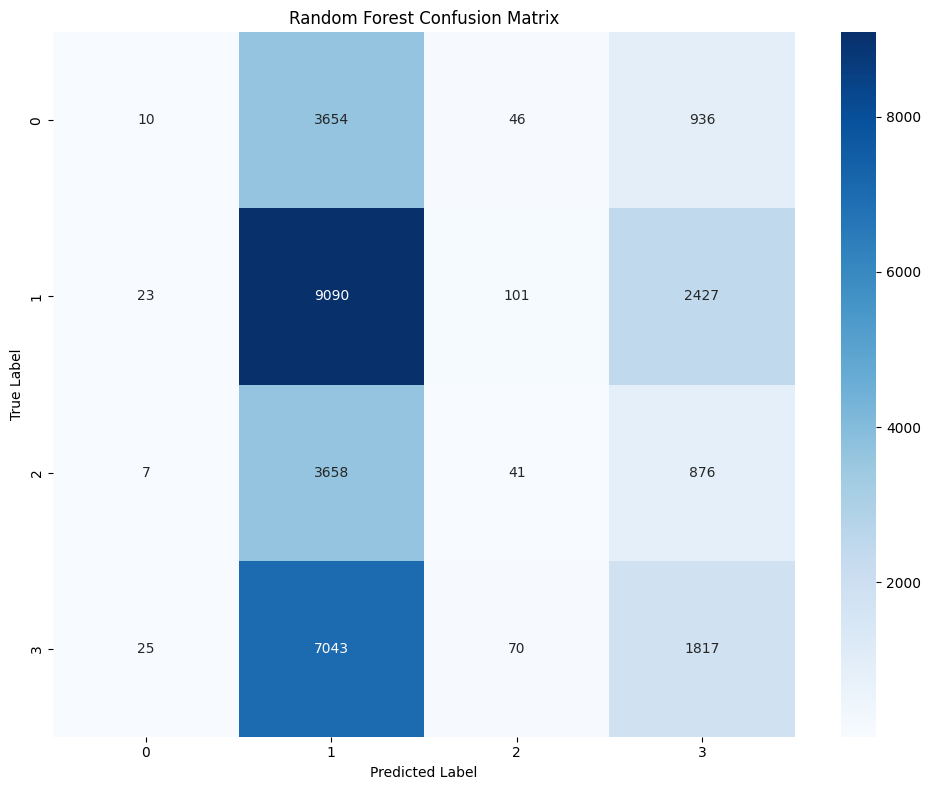

In [34]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_rf)
labels = sorted(list(set(y_test)))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


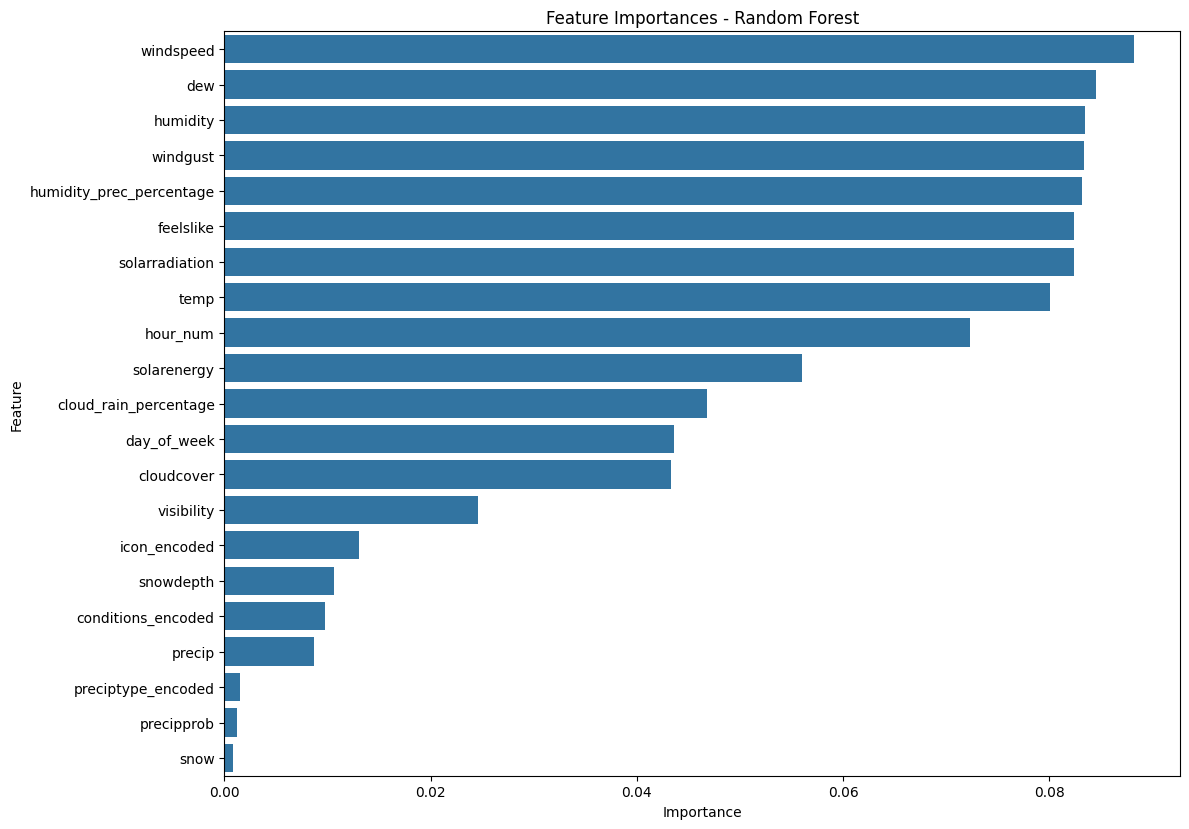

In [35]:
# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Get the corresponding feature names
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot all feature importances
plt.figure(figsize=(12, len(feature_names) * 0.4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [36]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

print("\nk-NN Train Accuracy:", accuracy_score(y_train, y_pred_train_knn))
print("k-NN Test Accuracy:", accuracy_score(y_test, y_pred_test_knn))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_knn))



k-NN Train Accuracy: 0.33879891359018205
k-NN Test Accuracy: 0.3130700107296137

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.15      0.16      0.16      4646
           1       0.39      0.53      0.45     11641
           2       0.16      0.09      0.11      4582
           3       0.31      0.23      0.26      8955

    accuracy                           0.31     29824
   macro avg       0.25      0.25      0.24     29824
weighted avg       0.29      0.31      0.30     29824



In [37]:
# lower accuracy with respect to random forest and XGBoost

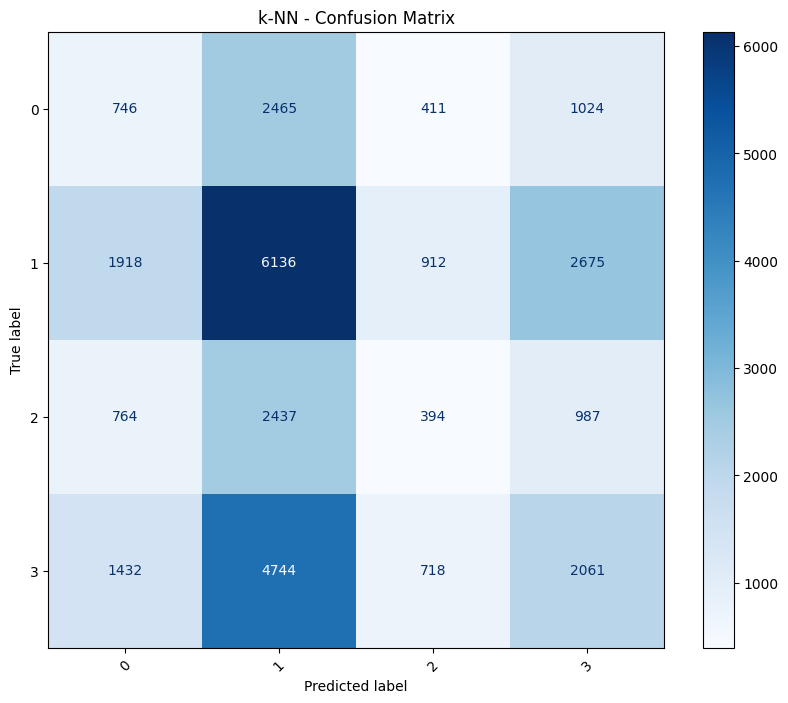

In [38]:
cm = confusion_matrix(y_test, y_pred_test_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("k-NN - Confusion Matrix")
plt.show()


In [39]:
# XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

print("\nXGBoost Train Accuracy:", accuracy_score(y_train, y_pred_train_xgb))
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_test_xgb))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_xgb))


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:22:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Train Accuracy: 0.4056432954431144
XGBoost Test Accuracy: 0.37660944206008584

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.21      0.00      0.00      4646
           1       0.39      0.86      0.54     11641
           2       0.12      0.00      0.00      4582
           3       0.30      0.13      0.19      8955

    accuracy                           0.38     29824
   macro avg       0.26      0.25      0.18     29824
weighted avg       0.29      0.38      0.27     29824



In [40]:
# better accuracy with respect to random forest and the best performance among other models

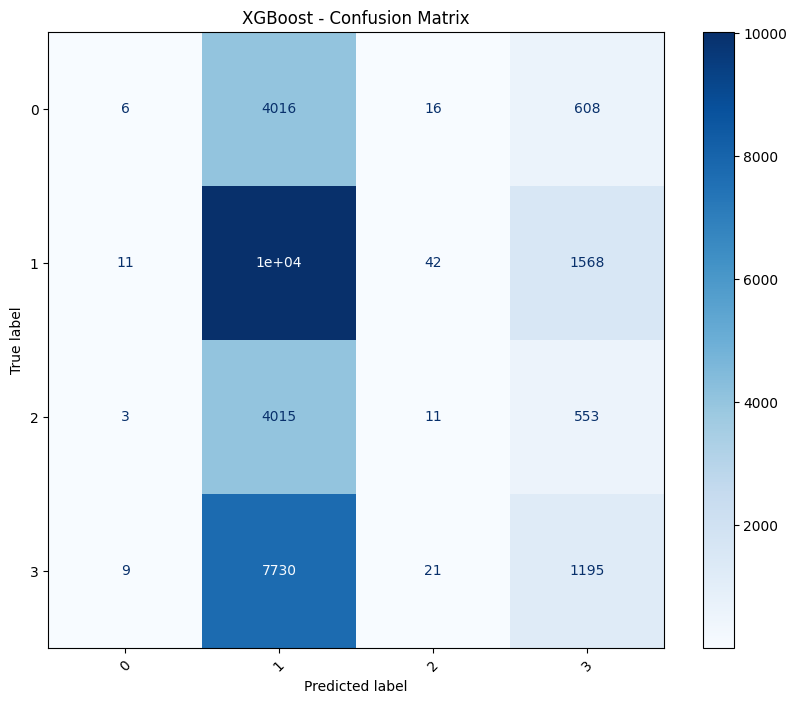

In [41]:
cm = confusion_matrix(y_test, y_pred_test_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("XGBoost - Confusion Matrix")
plt.show()


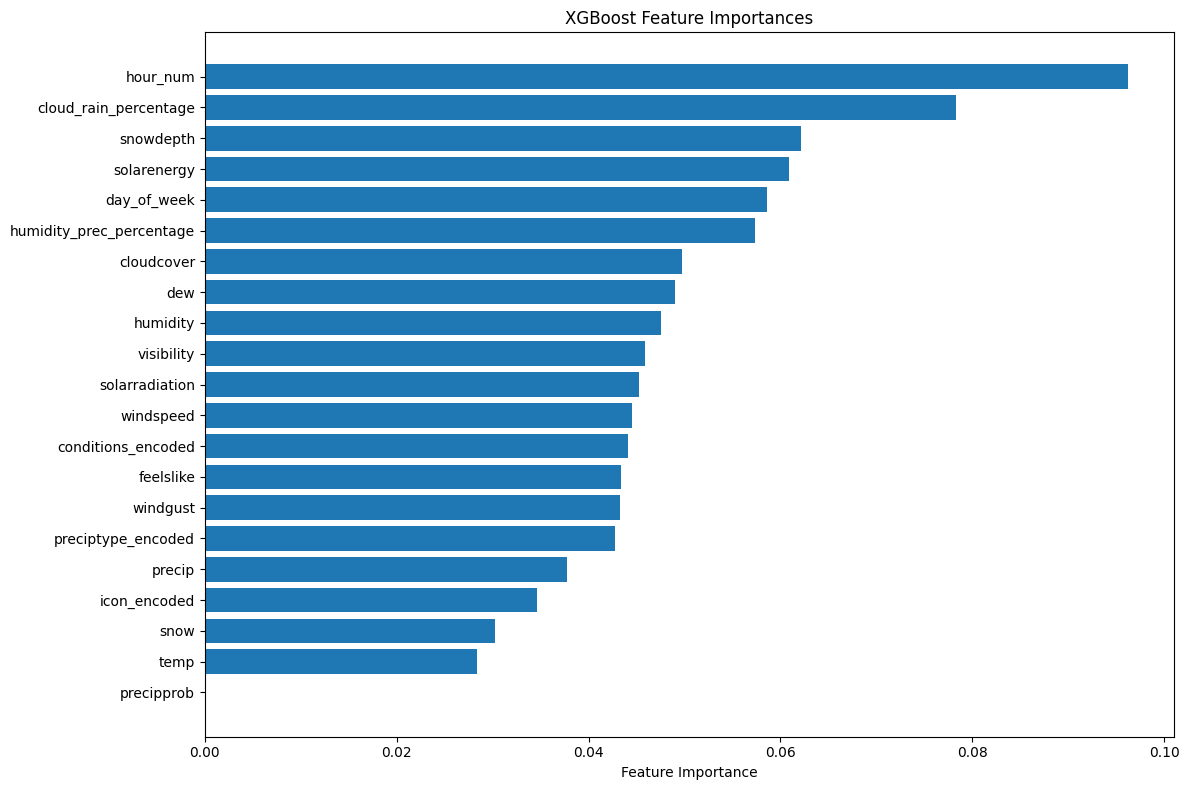

In [42]:
import numpy as np
# Feature importance visualization
importances = xgb_model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
feature_names = X_train.columns  # Get feature names from training data

plt.figure(figsize=(12, 8))
plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [43]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_train_nb = nb_model.predict(X_train)
y_pred_test_nb = nb_model.predict(X_test)

print("Naive Bayes Train Accuracy:", accuracy_score(y_train, y_pred_train_nb))
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred_test_nb))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_nb))


Naive Bayes Train Accuracy: 0.17522549709955404
Naive Bayes Test Accuracy: 0.17848041845493562

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.16      0.05      0.07      4646
           1       0.41      0.08      0.13     11641
           2       0.16      0.87      0.26      4582
           3       0.29      0.02      0.04      8955

    accuracy                           0.18     29824
   macro avg       0.26      0.25      0.13     29824
weighted avg       0.30      0.18      0.12     29824



In [44]:
# lowest accuracy

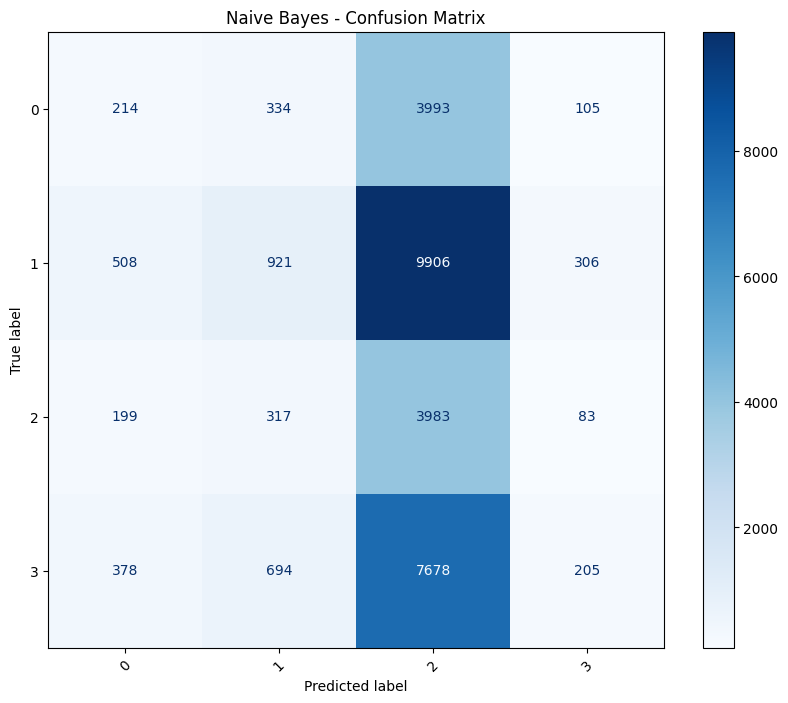

In [45]:

cm = confusion_matrix(y_test, y_pred_test_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Naive Bayes - Confusion Matrix")
plt.show()


In [46]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

print("Gradient Boosting Train Accuracy:", accuracy_score(y_train, y_pred_train_gb))
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_pred_test_gb))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_gb))


Gradient Boosting Train Accuracy: 0.3933038259061798
Gradient Boosting Test Accuracy: 0.3895520386266094

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4646
           1       0.39      0.99      0.56     11641
           2       0.12      0.00      0.00      4582
           3       0.30      0.01      0.01      8955

    accuracy                           0.39     29824
   macro avg       0.20      0.25      0.14     29824
weighted avg       0.26      0.39      0.22     29824



C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [47]:
# It has the highest test accuracy, but not good, cause generally have not predict category 0 at all

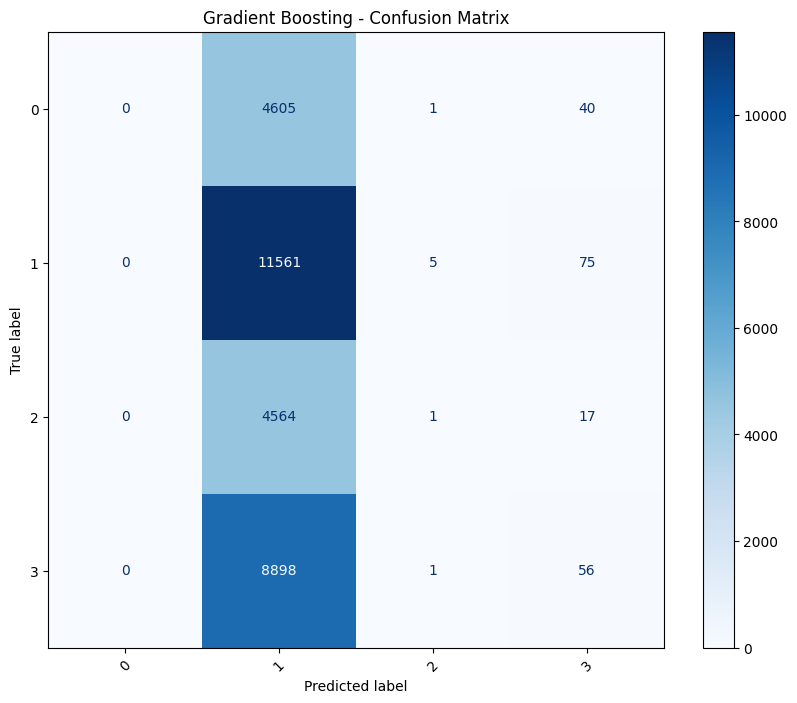

In [48]:
cm = confusion_matrix(y_test, y_pred_test_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


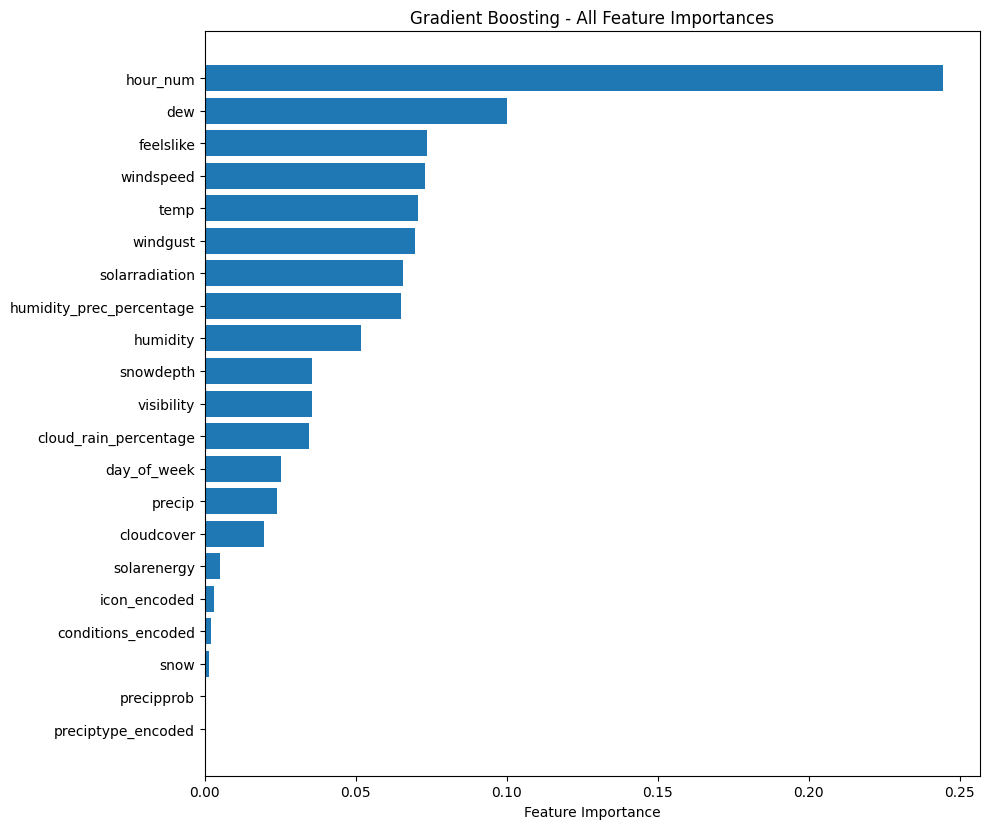

In [49]:
# Get feature importances and names
feature_importances = gb_model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot all features
plt.figure(figsize=(10, len(feature_names) * 0.4))  # Dynamic height based on number of features
plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting - All Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [50]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr_model.fit(X_train, y_train)

y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)

print("\nLogistic Regression Train Accuracy:", accuracy_score(y_train, y_pred_train_lr))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_test_lr))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_lr))

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Train Accuracy: 0.39210508667806726
Logistic Regression Test Accuracy: 0.3903232296137339

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4646
           1       0.39      1.00      0.56     11641
           2       0.00      0.00      0.00      4582
           3       0.00      0.00      0.00      8955

    accuracy                           0.39     29824
   macro avg       0.10      0.25      0.14     29824
weighted avg       0.15      0.39      0.22     29824



C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [51]:
# not good at all, cause it only predicts category 1

<Figure size 1000x1000 with 0 Axes>

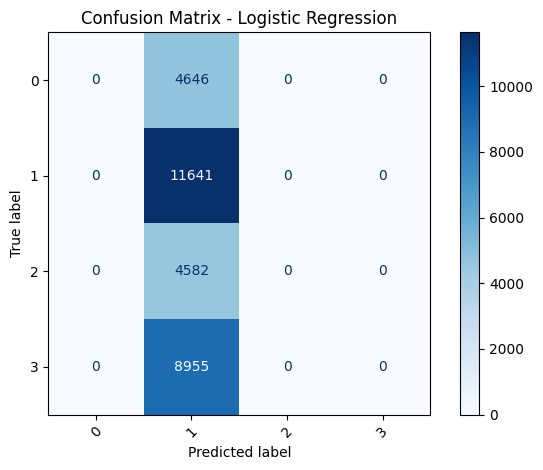

In [52]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test_lr)

# Create display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)

# Plot
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()


In [53]:
# As we have seen, XGBoost and Random Forest are the best models till now, while XGBoost was better than Random Forest between them, 
# and we can try to use grid search for them to look for better accuracy, however, we know KNN and Logistic 
# Regression are sensitive to imbalanced data, so let's try to smote the data for them
# that oversample the minority classes and provide the model with a more balanced and learnable training set to see if their accuracy increase or not

In [54]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to training data for KNN
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train KNN on resampled training data
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_train_knn = knn_model.predict(X_train_smote)
y_pred_test_knn = knn_model.predict(X_test)

# Results
print("\nk-NN Train Accuracy:", accuracy_score(y_train_smote, y_pred_train_knn))
print("k-NN Test Accuracy:", accuracy_score(y_test, y_pred_test_knn))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_knn))


k-NN Train Accuracy: 0.2943185462319615
k-NN Test Accuracy: 0.31303648068669526

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.15      0.16      0.16      4646
           1       0.39      0.53      0.45     11641
           2       0.16      0.09      0.11      4582
           3       0.31      0.23      0.26      8955

    accuracy                           0.31     29824
   macro avg       0.25      0.25      0.24     29824
weighted avg       0.29      0.31      0.30     29824



In [55]:

# Apply SMOTE only on the training data for Logistic Regression
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on SMOTE-resampled data
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr_model.fit(X_train_smote, y_train_smote)

# Predict on training and untouched test data
y_pred_train_lr = lr_model.predict(X_train_smote)
y_pred_test_lr = lr_model.predict(X_test)

# Results
print("\nLogistic Regression Train Accuracy:", accuracy_score(y_train_smote, y_pred_train_lr))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_test_lr))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_lr))

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Train Accuracy: 0.27179583110636024
Logistic Regression Test Accuracy: 0.25191121244635195

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.16      0.16      0.16      4646
           1       0.41      0.22      0.29     11641
           2       0.17      0.45      0.25      4582
           3       0.31      0.23      0.27      8955

    accuracy                           0.25     29824
   macro avg       0.26      0.27      0.24     29824
weighted avg       0.30      0.25      0.26     29824



In [56]:
# for KNN it decreased the accuracy, for Logistic Regression with respect to the previous prediction
# it has a way better predictions about other categories, but still it has low accuracy for prediction.
# So we will continue only with XGBoost and Random Forest

In [57]:
# Use Ml models, this time we are using Grid Search for both XGBoost and Random Forest models with 
# cross-validation to automatically find the best hyperparameters 
# for them, which improves the model's performance on prediction tasks.
# We start with XGBoost cause in base model was better than Random Forest:


# XGBoost
from sklearn.model_selection import GridSearchCV


# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Base XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softprob',
    random_state=42
)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model (no sample weights)
grid_search_xgb.fit(X_train, y_train)

# Get best model
best_xgb_model = grid_search_xgb.best_estimator_
print("\nBest Hyperparameters:", grid_search_xgb.best_params_)

# Predictions
y_pred_train_xgb = best_xgb_model.predict(X_train)
y_pred_test_xgb = best_xgb_model.predict(X_test)

# Accuracy
print("\nXGBoost Train Accuracy:", accuracy_score(y_train, y_pred_train_xgb))
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_test_xgb))

# Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_xgb))


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:25:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

XGBoost Train Accuracy: 0.39216376622070215
XGBoost Test Accuracy: 0.3903232296137339

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4646
           1       0.39      1.00      0.56     11641
           2       0.00      0.00      0.00      4582
           3       0.30      0.00      0.00      8955

    accuracy                           0.39     29824
   macro avg       0.17      0.25      0.14     29824
weighted avg       0.24      0.39      0.22     29824



C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [58]:
# As we see with normal grid search, it overfits two categories and forgets two other categories

In [59]:
# We can use sample_weights, which help us give more importance to minority classes during training.
# The sample_weight parameter adjusts the contribution of each sample to the loss function.
# It can be computed using sklearn's compute_sample_weight based on class distribution. It is helpful when classes are imbalanced

# XGBoost with sample weight
from sklearn.utils.class_weight import compute_sample_weight



# Define hyperparameter grid
param_grid = {
    'n_estimators': [70 ,80],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Base XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softprob',  # Multi-class classification
    random_state=42
)

# Compute sample weights for class balancing
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# GridSearchCV setup
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model using sample weights
grid_search_xgb.fit(X_train, y_train, sample_weight=sample_weights)

# Best model
best_xgb_model = grid_search_xgb.best_estimator_
print("\nBest Hyperparameters:", grid_search_xgb.best_params_)

# Predictions
y_pred_train_xgb = best_xgb_model.predict(X_train)
y_pred_test_xgb = best_xgb_model.predict(X_test)

# Accuracy
print("\nXGBoost Train Accuracy:", accuracy_score(y_train, y_pred_train_xgb))
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_test_xgb))

# Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_xgb))



Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 80, 'subsample': 0.8}

XGBoost Train Accuracy: 0.2724323508701338
XGBoost Test Accuracy: 0.2570077789699571

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.15      0.15      0.15      4646
           1       0.41      0.23      0.30     11641
           2       0.18      0.46      0.26      4582
           3       0.31      0.23      0.27      8955

    accuracy                           0.26     29824
   macro avg       0.26      0.27      0.24     29824
weighted avg       0.30      0.26      0.26     29824



In [ ]:
# with sample weight we see a way better percentages for categories 0, and 2, but generally, its accuracy decreased with respect to its base model

In [60]:
# Random Forest

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],

}

# Base model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get best model
best_rf_model = grid_search_rf.best_estimator_
print("\nBest Hyperparameters:", grid_search_rf.best_params_)

# Predictions
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

# Evaluation
print("\nRandom Forest Train Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_test_rf))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_rf))


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Train Accuracy: 0.39432652650638766
Random Forest Test Accuracy: 0.3891832081545064

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4646
           1       0.39      0.99      0.56     11641
           2       0.17      0.00      0.00      4582
           3       0.32      0.01      0.02      8955

    accuracy                           0.39     29824
   macro avg       0.22      0.25      0.15     29824
weighted avg       0.27      0.39      0.23     29824



C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [61]:
# as we see it has better accuracy than its previous base model, but totally did not predict category 0 which is not good

In [62]:
# Random Forest with sample weight

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],

}

# Base model
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV setup
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Compute class-balanced sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Fit the model using sample weights
grid_search_rf.fit(X_train, y_train, sample_weight=sample_weights)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_
print("\nBest Hyperparameters:", grid_search_rf.best_params_)

# Make predictions
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

# Evaluation metrics
print("\nRandom Forest Train Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_test_rf))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test_rf))


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest Train Accuracy: 0.2968933373570734
Random Forest Test Accuracy: 0.25063707081545067

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.15      0.18      0.16      4646
           1       0.40      0.20      0.27     11641
           2       0.18      0.45      0.26      4582
           3       0.32      0.25      0.28      8955

    accuracy                           0.25     29824
   macro avg       0.26      0.27      0.24     29824
weighted avg       0.30      0.25      0.25     29824



In [63]:
# with sample weight we see better percentage for category 0, but generally its accuracy decreased with respect to its base model

In [64]:
# In conclusion, using sample weights helped a bit with predicting the smaller classes, but it made the overall accuracy much worse. So 
# even though it was a little fairer, the model didn’t perform well overall. Because of that, the Baseline 
# XGBoost (without extra weights and grid search) is a better choice for this case, which had 37% test accuracy, which was more than Random
# Forest base model. The base models had better performance without using grid search or sample weight